# **Training data penjualan property in marla**

**Datasets Sources -> https://www.kaggle.com/code/manjitbaishya001/house-price-trend-analysis-and-price-prediction**

**This Project is made to train the datasets of marla property price by determining which types of model algorithm fits the datasets the best (Regression Task or Classification Task)**

# **In regression tasks:**

The target variable is continuous and quantitative in nature. For example, predicting the price of a house, the salary of an employee, or the sales amount of a product.
The goal is to estimate or predict the numerical value of the target variable based on the input features or independent variables.
Common regression algorithms include linear regression, decision tree regression, random forest regression, and support vector regression.

# **In classification tasks:**

The target variable is categorical or qualitative in nature. For example, predicting whether an email is spam or not (binary classification), classifying an image into different categories like dog, cat, or horse (multi-class classification).
The goal is to assign an instance (represented by the input features) to one of the predefined classes or categories.
Common classification algorithms include logistic regression, decision trees, random forests, support vector machines (SVMs), and neural networks.
To summarize:

Regression is used for predicting continuous numerical values.
Classification is used for predicting discrete class labels or categories.


Our Results are a pitiful results of Regression Data Algorithm results and a staggeringly good percentages of result of Classification Data Algorithm


Used Model Types:

-> Random Forest Regression 0.018 -> a regression

-> Logistic Regression Accuracy: 0.9865

-> Random Forest Classification Accuracy: 0.9885

**Group 1 Members:**

*   Rizki Sahat Arapenta Situmeang -> (Data Training, Visualization)
*   Iqbal Maulana -> Pengolahan data (Pre Processing)
*   Mahadika Setiawan -> Penggunaan korelasi heatmap



1. Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Perintah **from google.colab import drive** pada Python digunakan dalam Google Colab untuk mengimpor modul drive, yang memungkinkan akses ke penyimpanan Google Drive dari dalam notebook Colab.

- Perintah **drive.mount('/content/drive')** digunakan untuk mengaitkan folder Google Drive dengan lokasi yang ditentukan di dalam lingkungan Colab, dalam hal ini, folder tersebut akan terhubung ke dalam direktori /content/drive.

2. Import Dependencies

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.svm import SVR
from sklearn import linear_model, metrics
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

3. Fix bugged column and display dataframe data and info

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/house_prices.csv')
df = df.drop('Unnamed: 0', axis=1)

display(df)
df.info()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
99494,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  object 
 1   price          99499 non-null  int64  
 2   location       99499 non-null  object 
 3   city           99499 non-null  object 
 4   baths          99499 non-null  int64  
 5   purpose        99499 non-null  object 
 6   bedrooms       99499 non-null  int64  
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ MB


- **pd.read_csv('/content/drive/MyDrive/house_prices.csv')** digunakan untuk membaca file CSV yang disimpan di Google Drive pada path '/content/drive/MyDrive/house_prices.csv' dan memuatnya ke dalam sebuah DataFrame, yang disimpan dalam variabel df.

- **df = df.drop('Unnamed: 0', axis=1)** digunakan untuk menghapus kolom 'Unnamed: 0' dari DataFrame df. Kolom 'Unnamed: 0' sering kali muncul saat file CSV dibaca, dan seringkali merupakan indeks yang tidak disengaja. Kode ini menghapus kolom tersebut agar tidak mengganggu analisis data.

- **display(df)** digunakan untuk menampilkan DataFrame df, sehingga Anda dapat melihatnya di output notebook atau lingkungan yang digunakan.

- **df.info()** digunakan untuk memberikan informasi tentang DataFrame df, termasuk jumlah entri, jumlah kolom, tipe data untuk setiap kolom, dan jumlah nilai non-null dalam setiap kolom. Ini membantu Anda memahami struktur dan isi dari DataFrame yang dimuat.

4. Check Outlier

In [ ]:
val = df['price'].nsmallest(23)

# val = (df['price'] == 15500).sum()
print(val)

11958    15500
17517    15500
37939    15500
39559    15500
46409    15500
48987    15500
57826    15500
64643    15500
64646    15500
64819    15500
64820    15500
64838    15500
69170    15500
77084    15500
77095    15500
90536    15500
91514    15500
94493    15500
94494    15500
94609    15500
94610    15500
99086    15500
506      16000
Name: price, dtype: int64


- **val = df['price'].nsmallest(23)** digunakan untuk mengambil 23 nilai terkecil dari kolom 'price' dalam DataFrame df dan menyimpannya dalam variabel val. Ini akan mengurutkan nilai dalam kolom 'price' dari yang terkecil ke yang terbesar, lalu memilih 23 nilai terkecilnya.

- **print(val)** digunakan untuk mencetak nilai val. Jadi, kode ini akan mencetak 23 nilai terkecil dari kolom 'price' DataFrame df.

5. Apply min max normalization to normaliza outlier

In [ ]:
value = df['price']

min_value = value.min()
max_value = value.max()

# Apply min-max normalization
df['price'] = ((value - min_value) / (max_value - min_value)).round(4)

display(df)

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,0.2224,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,0.1534,E-11,Islamabad,3,For Sale,3,5.6
2,House,0.3673,G-15,Islamabad,6,For Sale,5,8.0
3,House,0.9688,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,0.1556,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
99494,Flat,0.1668,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,House,0.1957,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,House,0.3116,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,House,0.3116,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


- **value = df['price']** digunakan untuk mengambil kolom 'price' dari DataFrame df dan menyimpannya dalam variabel value.

- **min_value = value.min()** digunakan untuk menghitung nilai minimum dari kolom 'price' dan menyimpannya dalam variabel min_value.

- **max_value = value.max()** digunakan untuk menghitung nilai maksimum dari kolom 'price' dan menyimpannya dalam variabel max_value.

- **df['price'] = ((value - min_value) / (max_value - min_value)).round(4)** digunakan untuk menerapkan normalisasi min-max ke kolom 'price'. Normalisasi min-max adalah teknik untuk mengubah nilai-nilai dalam suatu fitur sehingga mereka berada dalam rentang tertentu (biasanya 0 hingga 1). Formula yang digunakan di sini adalah ((nilai - nilai minimum) / (nilai maksimum - nilai minimum)). round(4) digunakan untuk membulatkan hasil normalisasi menjadi 4 angka desimal.

- **display(df)** digunakan untuk menampilkan DataFrame df setelah normalisasi telah diterapkan pada kolom 'price'. Jadi, DataFrame yang ditampilkan akan memiliki kolom 'price' yang sudah dinormalisasi.

6. Pre-Processing

In [ ]:
## tarok disini lanjutan Pre Processingnya
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  object 
 1   price          99499 non-null  float64
 2   location       99499 non-null  object 
 3   city           99499 non-null  object 
 4   baths          99499 non-null  int64  
 5   purpose        99499 non-null  object 
 6   bedrooms       99499 non-null  int64  
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ MB


None

In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada fitur property_type
df['property_type_encoded'] = label_encoder.fit_transform(df['property_type'])

# Melakukan encoding pada fitur purpose
df['purpose_encoded'] = label_encoder.fit_transform(df['purpose'])

# Menghapus kolom property_type dan purpose yang tidak diperlukan lagi
df = df.drop(['property_type', 'purpose'], axis=1)

# Menampilkan hasil setelah encoding
display(df.head())
df.info()

,price,location,city,baths,bedrooms,Area_in_Marla,property_type_encoded,purpose_encoded
0,0.2224,G-10,Islamabad,2,2,4.0,1,1
1,0.1534,E-11,Islamabad,3,3,5.6,1,1
2,0.3673,G-15,Islamabad,6,5,8.0,2,1
3,0.9688,Bani Gala,Islamabad,4,4,40.0,2,1
4,0.1556,DHA Defence,Islamabad,3,3,8.0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  99499 non-null  float64
 1   location               99499 non-null  object 
 2   city                   99499 non-null  object 
 3   baths                  99499 non-null  int64  
 4   bedrooms               99499 non-null  int64  
 5   Area_in_Marla          99499 non-null  float64
 6   property_type_encoded  99499 non-null  int64  
 7   purpose_encoded        99499 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.1+ MB


7. Check for most commonly appeared value to detect the outlier

In [ ]:
most_common_value = df['price'].value_counts().idxmax()

count_of_most_common_value = df['price'].value_counts().max()

print("Most common value:", most_common_value)
print("Count of occurrences:", count_of_most_common_value)

Most common value: 0.0004
Count of occurrences: 2285


- **most_common_value = df['price'].value_counts().idxmax()** digunakan pada langkah pertama dalam menemukan nilai yang paling umum. **value_counts()** digunakan untuk menghitung frekuensi kemunculan setiap nilai unik dalam kolom 'price'. Kemudian, .**idxmax()** digunakan untuk mengambil indeks (nilai) dari hasil perhitungan yang memiliki frekuensi terbesar, yang berarti nilai yang paling umum dalam kolom tersebut. Hasilnya disimpan dalam variabel most_common_value.

- **count_of_most_common_value = df['price'].value_counts().max()** digunakan pada langkah kedua dalam menemukan nilai yang paling umum. .max() digunakan untuk mengambil nilai frekuensi terbesar dari hasil perhitungan frekuensi nilai yang unik. Ini mewakili jumlah kemunculan nilai yang paling umum. Hasilnya disimpan dalam variabel count_of_most_common_value.

- **print("Most common value:", most_common_value)** digunakan untuk mencetak nilai yang paling umum yang telah diidentifikasi sebelumnya.

- **print("Count of occurrences:", count_of_most_common_value)** digunakan untuk mencetak jumlah kemunculan nilai yang paling umum yang telah dihitung sebelumnya.

7. As we can see, outliernya sangat lah terlihat di data dengan value seperti visualisasi dibawah

In [ ]:
## Restruktur index

df.reset_index(drop=True, inplace=True)
display(df)

,price,location,city,baths,bedrooms,Area_in_Marla,property_type_encoded,purpose_encoded
0,0.2224,G-10,Islamabad,2,2,4.0,1,1
1,0.1534,E-11,Islamabad,3,3,5.6,1,1
2,0.3673,G-15,Islamabad,6,5,8.0,2,1
3,0.9688,Bani Gala,Islamabad,4,4,40.0,2,1
4,0.1556,DHA Defence,Islamabad,3,3,8.0,2,1
...,...,...,...,...,...,...,...,...
99494,0.1668,Bahria Town Karachi,Karachi,3,3,8.0,1,1
99495,0.1957,Bahria Town Karachi,Karachi,4,3,8.0,2,1
99496,0.3116,Bahria Town Karachi,Karachi,3,3,8.0,2,1
99497,0.3116,Bahria Town Karachi,Karachi,4,4,14.0,2,1


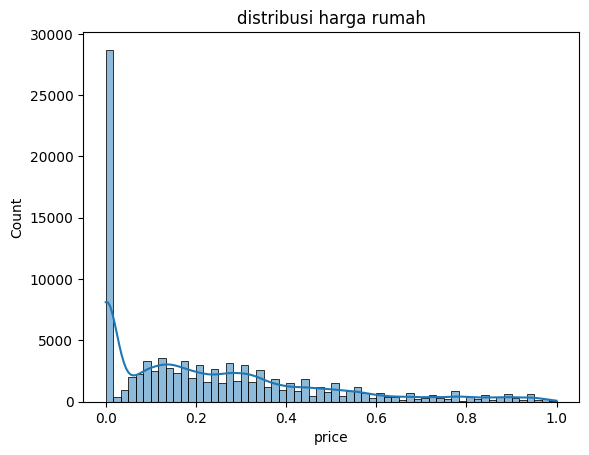

In [ ]:
sns.histplot(df['price'], kde=True, bins=60)
plt.title('distribusi harga rumah')
plt.show()

- **sns.histplot()** digunakan untuk membuat histogram, dengan parameter df**['price']** sebagai data harga rumah yang ingin divisualisasikan. **kde=True** menunjukkan bahwa garis estimasi kepadatan kernel (KDE) akan ditampilkan bersama dengan histogram. **bins=60** menentukan jumlah bin yang akan digunakan dalam histogram.

- **plt.title('distribusi harga rumah')** menambahkan judul pada plot yang dibuat, dengan teks 'distribusi harga rumah'.

- **plt.show()** akan menampilkan plot histogram yang sudah dibuat.

8. Normalisasi datasetnya dan display outlier yang dideteksi

,price,location,city,baths,bedrooms,Area_in_Marla,property_type_encoded,purpose_encoded
24,0.0004,G-15,Islamabad,2,2,8.0,3,0
25,0.0007,Pakistan Town,Islamabad,5,3,24.0,2,0
27,0.0000,Islamabad Expressway,Islamabad,2,2,5.0,3,0
29,0.0010,G-8,Islamabad,2,2,9.3,3,0
94,0.0004,Bahria Town Rawalpindi,Rawalpindi,3,3,10.0,6,0
...,...,...,...,...,...,...,...,...
99437,0.0007,G-13,Islamabad,3,3,10.0,3,0
99438,0.0009,PWD Housing Scheme,Islamabad,6,5,10.0,2,0
99440,0.0007,PWD Housing Scheme,Islamabad,3,3,12.0,3,0
99442,0.0019,E-11,Islamabad,7,5,64.0,2,0


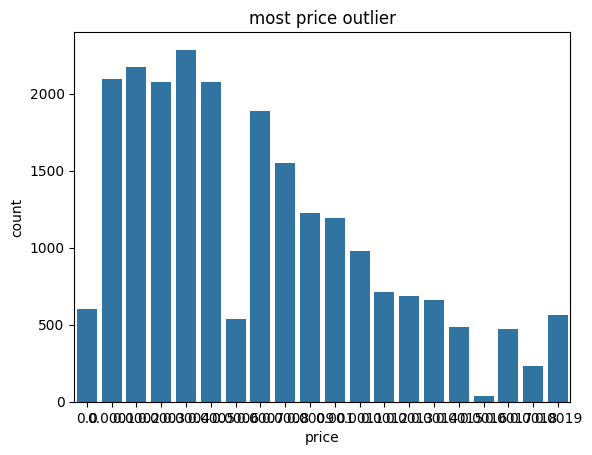

In [ ]:
df_small = df[df['price'] < 0.002]
display(df_small)
sns.countplot(x='price', data=df_small)
plt.title('most price outlier')
plt.show()

- **df_small = df[df['price'] < 0.002]** digunakan untuk membuat DataFrame baru yang disebut df_small yang hanya berisi baris-baris di mana nilai dalam kolom 'price' kurang dari 0.002. Dengan kata lain, ini memilih entri yang dianggap sebagai outlier berdasarkan batasan tersebut.

- **display(df_small)** digunakan untuk menampilkan DataFrame df_small, sehingga Anda dapat melihat baris-baris yang dipilih berdasarkan kriteria yang diberikan.

9. Drop the outlier then buat the first visualization which is a histplot untuk melihat persebaran data price

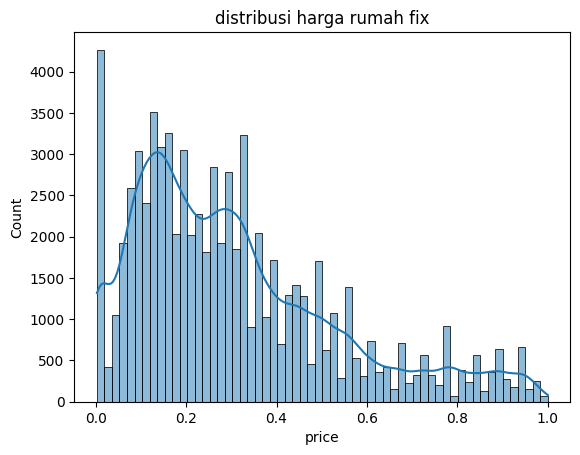

In [ ]:
df.drop(df[df['price'] <= 0.0027].index, inplace=True)
# df.drop(columns=['level_0'], inplace=True)
df = df.reset_index()
sns.histplot(df['price'], kde=True, bins=60)
plt.title('distribusi harga rumah fix')
plt.show()

- **df.drop(df[df['price'] <= 0.0027].index, inplace=True)** menggunakan metode drop() dari objek DataFrame (df) untuk menghapus baris-baris di mana nilai kolom 'price' kurang dari atau sama dengan 0.0027. Baris-baris ini diidentifikasi menggunakan indexing boolean **(df[df['price'] <= 0.0027].index)**, yang kemudian digunakan sebagai argumen dalam fungsi drop(). Argumen **inplace=True** menunjukkan bahwa perubahan akan diterapkan pada DataFrame yang ada secara langsung.

- **df = df.reset_index()** digunakan untuk memanggil metode reset_index() pada DataFrame df untuk me-reset indeks baris. Ini umumnya dilakukan setelah penghapusan baris atau manipulasi data lainnya yang mengakibatkan perubahan indeks, sehingga memastikan indeks baris tetap konsisten setelah manipulasi.

- **sns.histplot(df['price'], kde=True, bins=60)** menggunakan fungsi histplot() dari library seaborn (diwakili sebagai sns) untuk membuat histogram dari kolom 'price' dari DataFrame yang telah dimodifikasi (df). Argumen **kde=True** menunjukkan bahwa kurva kepadatan juga akan ditampilkan bersama dengan histogram. Argumen **bins=60** menentukan jumlah bin atau kategori yang digunakan dalam histogram.

- **plt.title('distribusi harga rumah fix')** digunakan untuk menetapkan judul untuk plot menggunakan fungsi title() dari library matplotlib (diwakili sebagai plt). Judul yang diberikan adalah 'distribusi harga rumah fix'.

- **plt.show()** untuk menampilkan plot yang telah dibuat menggunakan fungsi show() dari library matplotlib.

10. Penggunaan pairwise visualisasi untuk membandingkan data price, area_in_marla, baths dan bedrooms

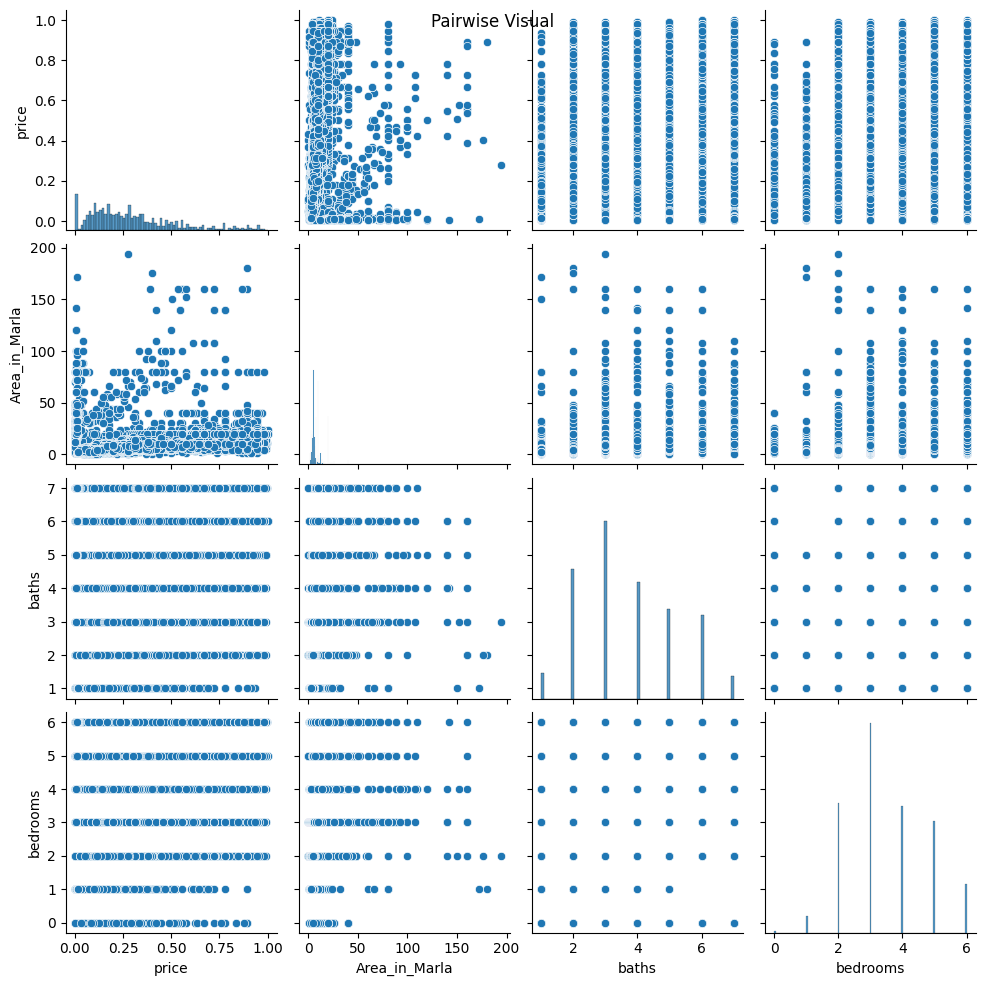

In [ ]:
sns.pairplot(df[['price', 'Area_in_Marla', 'baths', 'bedrooms']])
plt.suptitle('Pairwise Visual')
plt.show()

- **sns.pairplot(df[['price', 'Area_in_Marla', 'baths', 'bedrooms']])** digunakan untuk membuat scatterplot matrix menggunakan fungsi pairplot() dari library seaborn. Matrix ini dibuat dengan variabel numerik yang dipilih, yaitu 'price', 'Area_in_Marla', 'baths', dan 'bedrooms', yang diambil dari DataFrame df.

- **plt.suptitle('Pairwise Visual')** menambahkan judul untuk keseluruhan plot menggunakan fungsi suptitle() dari library matplotlib (diwakili sebagai plt). Judul yang diberikan adalah 'Pairwise Visual'.

- **plt.show()** digunakan untuk menampilkan plot yang telah dibuat menggunakan fungsi show() dari library matplotlib.

11. Penggunaan korelasi heatmap untuk mengecek korelasi antara kolom data

<ipython-input-139-5d8bf57c286d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


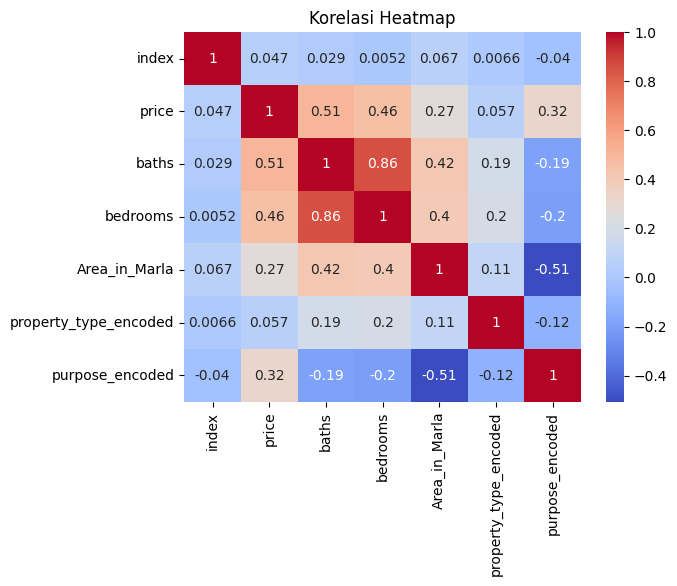

In [ ]:
# df.drop(columns=['level_0'], inplace=True)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Korelasi Heatmap')
plt.show()

- **sns.heatmap(df.corr(), annot=True, cmap="coolwarm")** membuat heatmap menggunakan fungsi heatmap() dari library seaborn (diwakili sebagai sns). Argumen **df.corr()** digunakan untuk menghitung korelasi antar kolom dalam DataFrame df, dan kemudian hasilnya divisualisasikan. Argumen **annot=True** digunakan untuk menampilkan nilai-nilai korelasi di dalam sel heatmap. Argumen **cmap="coolwarm"** digunakan untuk menentukan skema warna yang digunakan dalam heatmap.

- **plt.title('Korelasi Heatmap')** digunakan untuk menetapkan judul untuk plot menggunakan fungsi title() dari library matplotlib (diwakili sebagai plt). Judul yang diberikan adalah 'Korelasi Heatmap'.

- **plt.show()** digunakan untuk menampilkan plot yang telah dibuat menggunakan fungsi show() dari library matplotlib.

In [ ]:
print(df.columns)


Index(['index', 'price', 'location', 'city', 'baths', 'bedrooms',
       'Area_in_Marla', 'property_type_encoded', 'purpose_encoded'],
      dtype='object')


12. Penggunaan boxplot untuk membandingkan berdasarkan kategory purpose, property_tytpe dan city

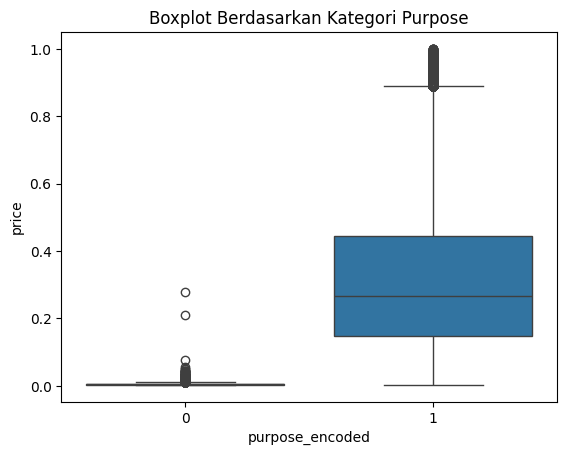

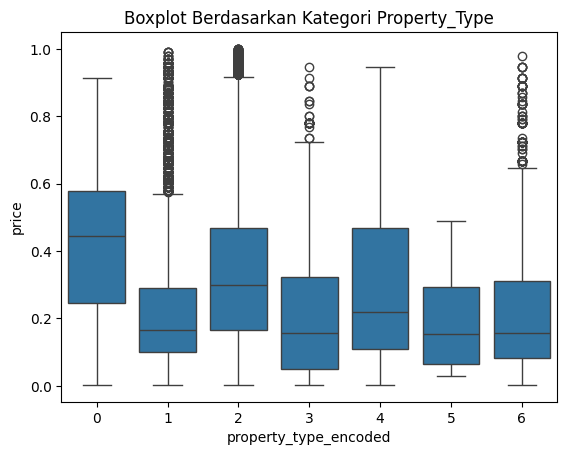

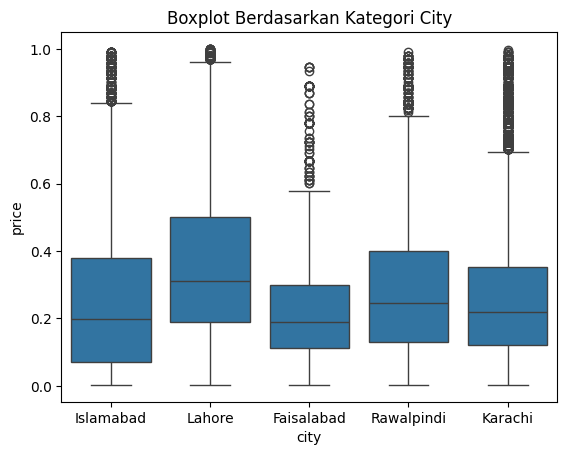

In [ ]:
sns.boxplot(x='purpose_encoded', y='price', data=df)
plt.title('Boxplot Berdasarkan Kategori Purpose')
plt.show()

sns.boxplot(x='property_type_encoded', y='price', data=df)
plt.title('Boxplot Berdasarkan Kategori Property_Type')
plt.show()

sns.boxplot(x='city', y='price', data=df)
plt.title('Boxplot Berdasarkan Kategori City')
plt.show()

- **sns.boxplot(x='purpose_encoded', y='price', data=df)** untuk membuat sebuah boxplot menggunakan seaborn. Parameter x adalah kolom yang akan digunakan untuk mengelompokkan data (dalam hal ini 'purpose_encoded'), sedangkan parameter y adalah kolom yang akan diplot di sumbu y (dalam hal ini 'price'). Data yang digunakan adalah DataFrame 'df'.

- **plt.title('Boxplot Berdasarkan Kategori Purpose')** digunakan untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Boxplot Berdasarkan Kategori Purpose'.

- **sns.boxplot(x='property_type_encoded', y='price', data=df))** untuk membuat sebuah boxplot menggunakan seaborn. Parameter x adalah kolom yang akan digunakan untuk mengelompokkan data (dalam hal ini 'property_type_encoded'), sedangkan parameter y adalah kolom yang akan diplot di sumbu y (dalam hal ini 'price'). Data yang digunakan adalah DataFrame 'df'.

- **plt.title('Boxplot Berdasarkan Kategori Property_Type')** digunakan untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Boxplot Berdasarkan Kategori Property_Type'.

- **sns.boxplot(x='city', y='price', data=df)** untuk membuat sebuah boxplot menggunakan seaborn. Parameter x adalah kolom yang akan digunakan untuk mengelompokkan data (dalam hal ini 'city'), sedangkan parameter y adalah kolom yang akan diplot di sumbu y (dalam hal ini 'price'). Data yang digunakan adalah DataFrame 'df'.

- **plt.title('Boxplot Berdasarkan Kategori City')** digunakan untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Boxplot Berdasarkan Kategori city'.

- **plt.show()**digunakan untuk menampilkan plot yang telah dibuat.

13. Penggunaan scatter plot untuk membandingkan harga harga berdasarkan area_in_marla, baths, dan bedrooms

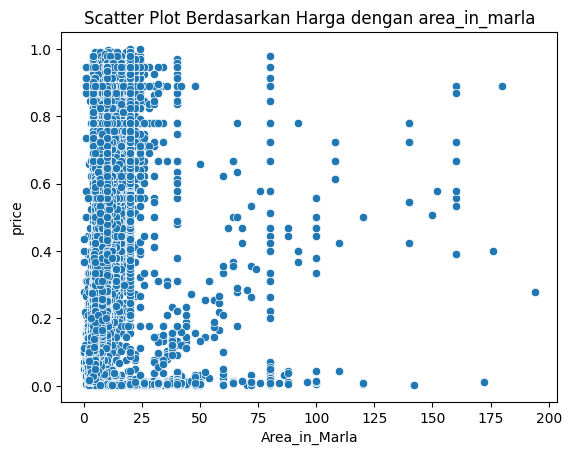

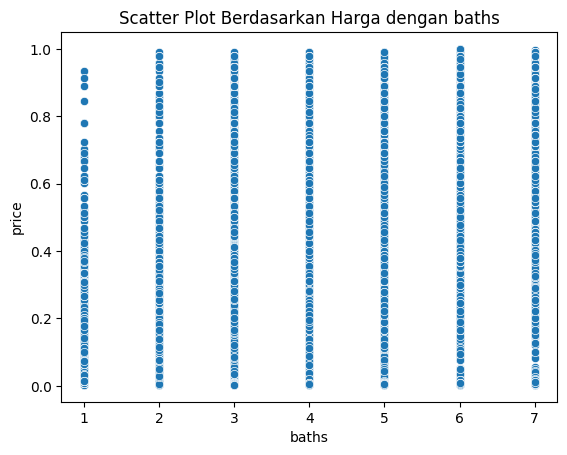

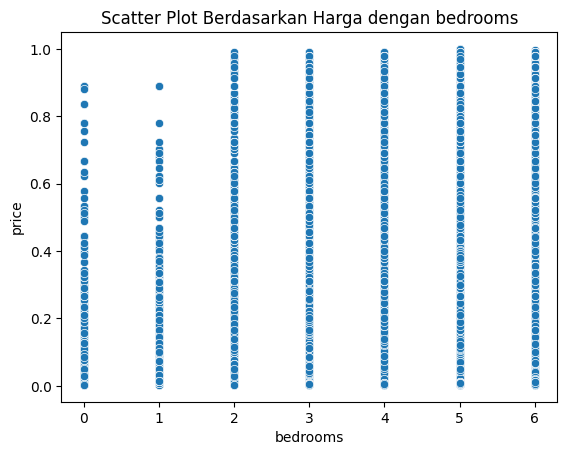

In [ ]:
sns.scatterplot(x='Area_in_Marla', y='price', data=df)
plt.title('Scatter Plot Berdasarkan Harga dengan area_in_marla')
plt.show()

sns.scatterplot(x='baths', y='price', data=df)
plt.title('Scatter Plot Berdasarkan Harga dengan baths')
plt.show()

sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Scatter Plot Berdasarkan Harga dengan bedrooms')
plt.show()

- **sns.scatterplot(x='Area_in_Marla', y='price', data=df)** untuk membuat scatter plot menggunakan seaborn. Parameter x adalah kolom yang akan diplot di sumbu x (dalam hal ini 'Area_in_Marla'), sedangkan parameter y adalah kolom yang akan diplot di sumbu y (dalam hal ini 'price'). Data yang digunakan adalah DataFrame 'df'.

- **plt.title('Scatter Plot Berdasarkan Harga dengan area_in_marla')** untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Scatter Plot Berdasarkan Harga dengan area_in_marla'.

- **sns.scatterplot(x='baths', y='price', data=df))** untuk membuat scatter plot menggunakan seaborn. Parameter x adalah kolom yang akan diplot di sumbu x (dalam hal ini 'baths'), sedangkan parameter y adalah kolom yang akan diplot di sumbu y (dalam hal ini 'price'). Data yang digunakan adalah DataFrame 'df'.

- **plt.title('Scatter Plot Berdasarkan Harga dengan baths')** untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Scatter Plot Berdasarkan Harga dengan baths'.

- **sns.scatterplot(x='bedrooms', y='price', data=df)** untuk membuat scatter plot menggunakan seaborn. Parameter x adalah kolom yang akan diplot di sumbu x (dalam hal ini 'bedrooms'), sedangkan parameter y adalah kolom yang akan diplot di sumbu y (dalam hal ini 'price'). Data yang digunakan adalah DataFrame 'df'.

- **plt.title('Scatter Plot Berdasarkan Harga dengan bedrooms')** untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Scatter Plot Berdasarkan Harga dengan bedrooms'.

- **plt.show()** untuk menampilkan plot yang telah dibuat.

14. Penggunaan countplot untuk melihat data dari purpose_encoded, property_type_encoded dan city

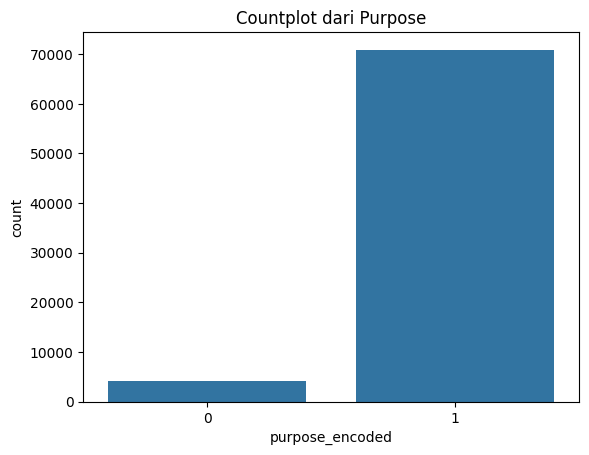

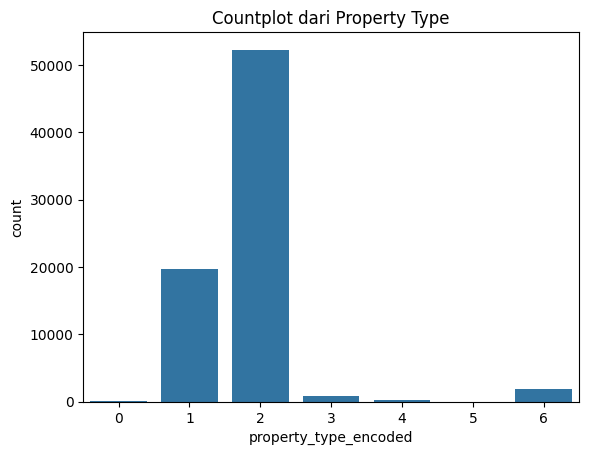

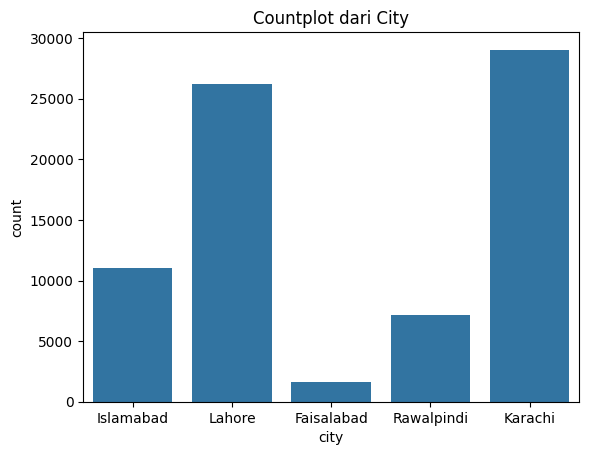

In [ ]:
sns.countplot(x='purpose_encoded', data=df)
plt.title('Countplot dari Purpose')
plt.show()

sns.countplot(x='property_type_encoded', data=df)
plt.title('Countplot dari Property Type')
plt.show()

sns.countplot(x='city', data=df)
plt.title('Countplot dari City')
plt.show()

- **sns.countplot(x='purpose_encoded', data=df)** untuk membuat countplot menggunakan seaborn. Parameter x adalah kolom yang akan diplot di sumbu x (dalam hal ini 'purpose_encoded'). Data yang digunakan adalah DataFrame 'df'.

- **plt.title('Countplot dari Purpose Encoded')** untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Countplot dari Purpose Encoded'.

- **sns.countplot(x='property_type_encoded', data=df)** untuk membuat countplot menggunakan seaborn. Parameter x adalah kolom yang akan diplot di sumbu x (dalam hal ini 'property_type_encoded'). Data yang digunakan adalah DataFrame 'df'.

- **plt.title('Countplot dari Property Type Encoded')** untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'countplot Property Type Encoded'.

- **sns.countplot(x='city', data=df)** untuk membuat countplot menggunakan seaborn. Parameter x adalah kolom yang akan diplot di sumbu x (dalam hal ini 'city'). Data yang digunakan adalah DataFrame 'df'.

- **plt.title('Countplot dari City')** untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Countplot dari City'.

- **plt.show()** untuk menampilkan plot yang telah dibuat.

15. Penggunaan boxplot untuk membandingkan berdasarkan price, Area_in_Marla, baths, bedrooms

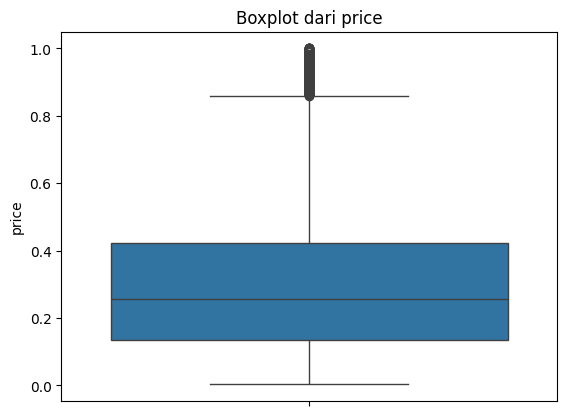

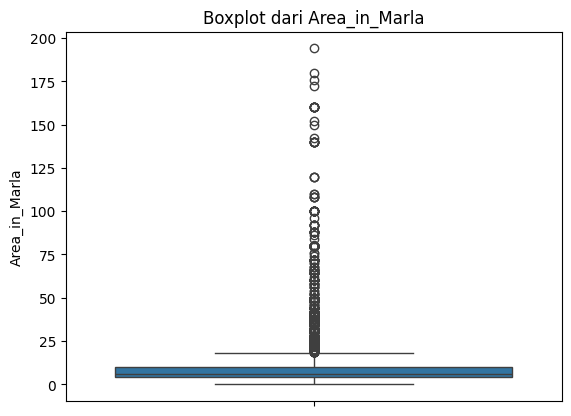

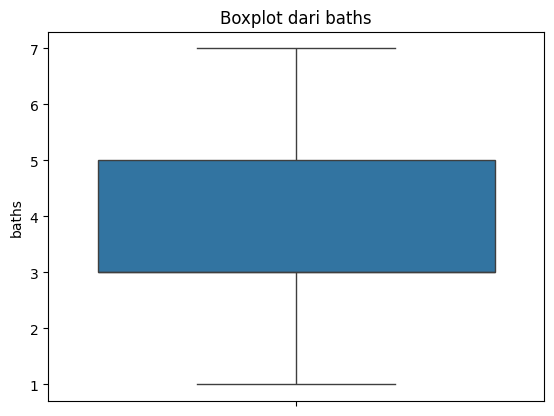

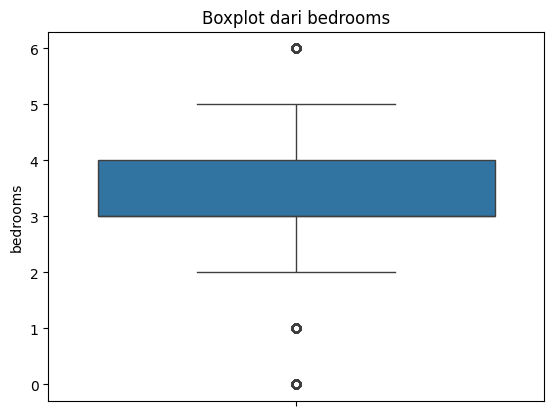

In [ ]:
sns.boxplot(df['price'])
plt.title('Boxplot dari price')
plt.show()

sns.boxplot(df['Area_in_Marla'])
plt.title('Boxplot dari Area_in_Marla')
plt.show()

sns.boxplot(df['baths'])
plt.title('Boxplot dari baths')
plt.show()

sns.boxplot(df['bedrooms'])
plt.title('Boxplot dari bedrooms')
plt.show()

- **sns.boxplot(df['price'])** untuk membuat boxplot menggunakan seaborn. Parameter yang diberikan adalah kolom 'price' dari DataFrame 'df'.

- **plt.title('Boxplot dari price')** untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Boxplot dari price'.

- **sns.boxplot(df['Area_in_Marla'])** untuk membuat boxplot menggunakan seaborn. Parameter yang diberikan adalah kolom 'Area_in_Marla' dari DataFrame 'df'.

- **plt.title('Boxplot dari Area_in_Marla')** untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Boxplot dari Area_in_Marla'.

- **sns.boxplot(df['baths'])** untuk membuat boxplot menggunakan seaborn. Parameter yang diberikan adalah kolom 'baths' dari DataFrame 'df'.

- **plt.title('Boxplot dari baths')** untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Boxplot dari baths'.

- **sns.boxplot(df['bedrooms'])** untuk membuat boxplot menggunakan seaborn. Parameter yang diberikan adalah kolom 'bedrooms' dari DataFrame 'df'.

- **plt.title('Boxplot dari bedrooms')** untuk memberi judul pada plot yang sedang dibuat. Judulnya adalah 'Boxplot dari bedrooms'.

- **plt.show()** untuk menampilkan plot yang telah dibuat.

16. Penggunaan jointplot untuk melihat kepadatan data

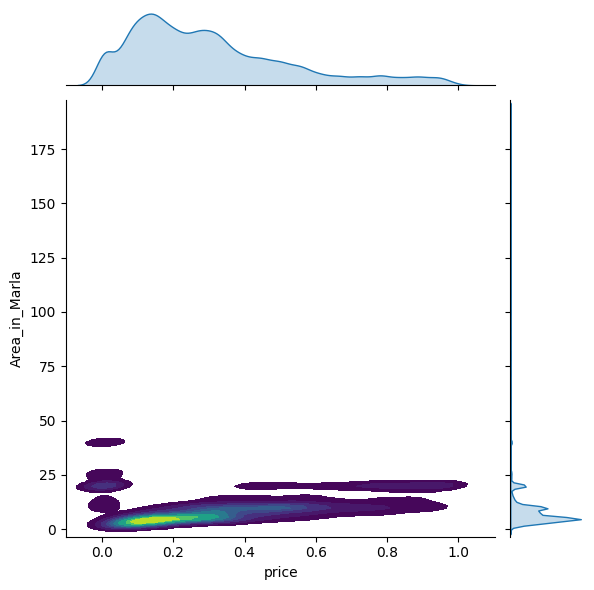

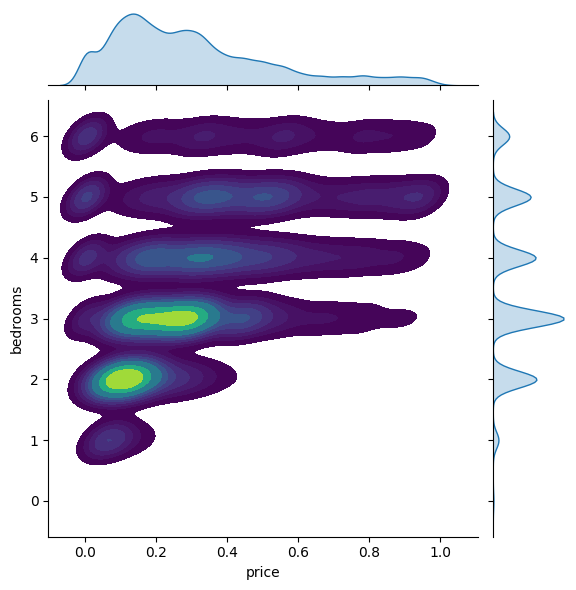

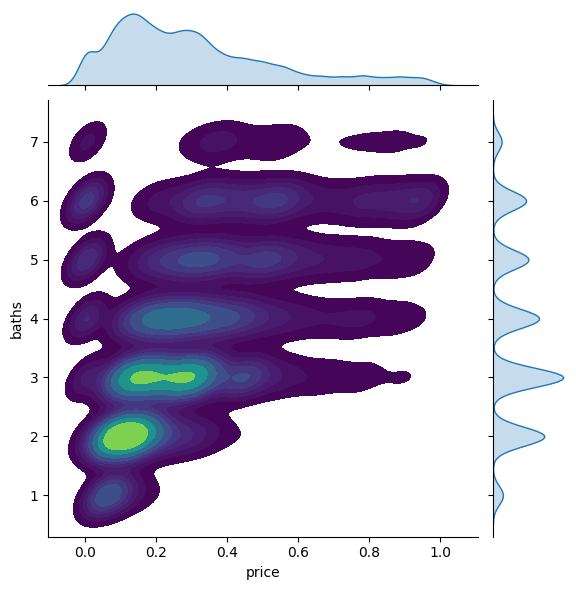

In [ ]:
sns.jointplot(x="price", y="Area_in_Marla", data=df, kind="kde", fill=True, cmap="viridis")

sns.jointplot(x="price", y="bedrooms", data=df, kind="kde", fill=True, cmap="viridis")

sns.jointplot(x="price", y="baths", data=df, kind="kde", fill=True, cmap="viridis")

- **sns.jointplot(x="price", y="Area_in_Marla", data=df, kind="kde", fill=True, cmap="viridis")** untuk membuat joint plot menggunakan seaborn. Parameter x adalah kolom yang akan diplot di sumbu x (dalam hal ini 'price'), dan parameter y adalah kolom yang akan diplot di sumbu y (dalam hal ini 'Area_in_Marla'). Data yang digunakan adalah DataFrame 'df'. Argumen **kind="kde"** menunjukkan bahwa jenis plot yang dihasilkan adalah Kernel Density Estimate. Argumen **fill=True** menunjukkan bahwa area di bawah kurva KDE akan diisi. Argumen **cmap="viridis"** menentukan skema warna yang digunakan.

- **sns.jointplot(x="price", y="bedrooms", data=df, kind="kde", fill=True, cmap="viridis")** untuk membuat joint plot menggunakan seaborn. Parameter x adalah kolom yang akan diplot di sumbu x (dalam hal ini 'price'), dan parameter y adalah kolom yang akan diplot di sumbu y (dalam hal ini 'bedrooms'). Data yang digunakan adalah DataFrame 'df'. Argumen **kind="kde"** menunjukkan bahwa jenis plot yang dihasilkan adalah Kernel Density Estimate. Argumen **fill=True** menunjukkan bahwa area di bawah kurva KDE akan diisi. Argumen **cmap="viridis"** menentukan skema warna yang digunakan.

- **sns.jointplot(x="price", y="baths", data=df, kind="kde", fill=True, cmap="viridis")** untuk membuat joint plot menggunakan seaborn. Parameter x adalah kolom yang akan diplot di sumbu x (dalam hal ini 'price'), dan parameter y adalah kolom yang akan diplot di sumbu y (dalam hal ini 'baths'). Data yang digunakan adalah DataFrame 'df'. Argumen **kind="kde"** menunjukkan bahwa jenis plot yang dihasilkan adalah Kernel Density Estimate. Argumen **fill=True** menunjukkan bahwa area di bawah kurva KDE akan diisi. Argumen **cmap="viridis"** menentukan skema warna yang digunakan.

Final Part, Data Training Model
in this part we are using one of each type of training task, the regression task (Random Forest) and the classification task (Logistic Regression)

In [ ]:
# Separate features and target variables
features = ['baths', 'bedrooms', 'property_type_encoded', 'location', 'city']
X = df[features]
y_reg = df['price']

In [ ]:
# One-hot encode categorical features
categorical_features = ['location', 'city', 'property_type_encoded']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = ct.fit_transform(X)

In [ ]:
# Label encode the target variable for classification
le = LabelEncoder()
y_class = le.fit_transform(df['purpose_encoded'])

In [ ]:
# Split data into train and test sets
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(X, y_reg, y_class, test_size=0.2, random_state=42)


In [ ]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_reg_train)
y_reg_pred = rf_reg.predict(X_test)
regression_mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Random Forest Regression MSE: {regression_mse:.4f}")

Random Forest Regression MSE: 0.0168


In [ ]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_class_train)
y_class_pred = logreg.predict(X_test)
classification_accuracy = accuracy_score(y_class_test, y_class_pred)
print(f"Logistic Regression Accuracy: {classification_accuracy:.4f}")

Logistic Regression Accuracy: 0.9865


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest Classification
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train, y_class_train)
y_class_pred = rf_class.predict(X_test)
classification_accuracy = accuracy_score(y_class_test, y_class_pred)
print(f"Random Forest Classification Accuracy: {classification_accuracy:.4f}")


Random Forest Classification Accuracy: 0.9885
